<h3>Introduction to image analysis</h3>
<h4>Imports and Basic image handling</h4>
<item>
    <h6>exercice 1-2-3: Reading an image, and checking its shape and data type</h6>
</item>

In [135]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [136]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [137]:
print("Image Shape:", im_org.shape, "\nImage Type:", im_org.dtype)

Image Shape: (512, 512) 
Image Type: uint8


<h6>exercice 4: Displaying the image</h6>

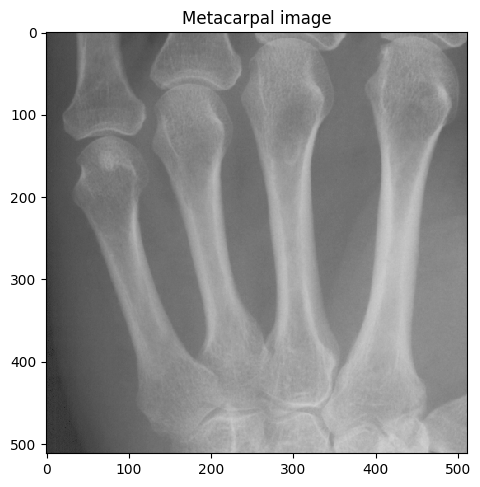

In [138]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

<h4>Color maps</h4>
<h6>exercice 5-6: Display an image using colormaps</h6>

Text(0.5, 1.0, 'pink colormaps')

<Figure size 640x480 with 0 Axes>

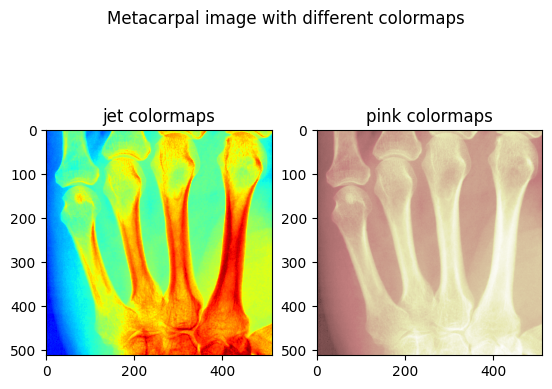

In [139]:
plt.figure()

f, axarr = plt.subplots(1, 2)
f.suptitle("Metacarpal image with different colormaps")
axarr[0].imshow(im_org, cmap="jet")
axarr[0].set_title("jet colormaps")
axarr[1].imshow(im_org, cmap="pink")
axarr[1].set_title("pink colormaps")
#io.imshow(im_org, cmap="jet")
#io.imshow(im_org, cmap="pink")
#plt.title('Metacarpal image (with colormap)')

<h4>Grey scale scaling</h4>
<h6>exercice 7: Scale visualisation on a grey scale</h6>

Before grey scaling


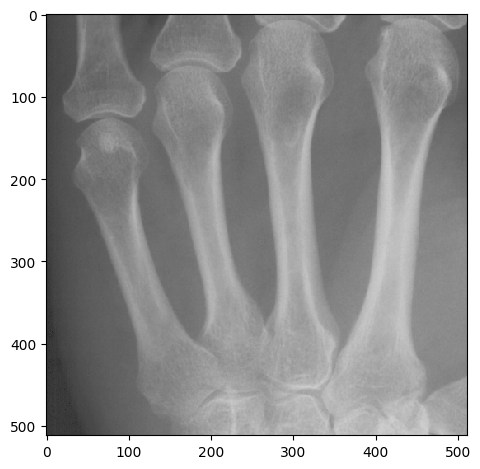

After Grey Scaling


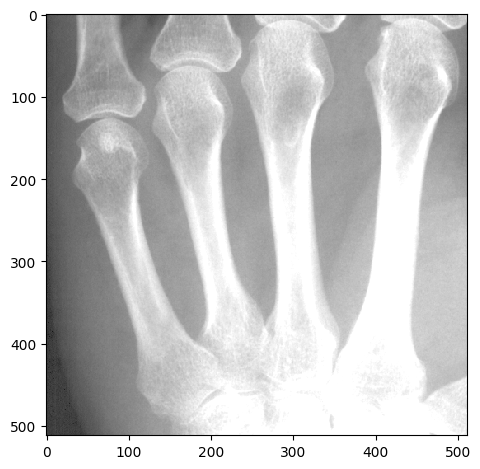

In [140]:
print("Before grey scaling")
io.imshow(im_org)
plt.show()
print("After Grey Scaling")
io.imshow(im_org, vmin=20, vmax=170)
plt.show()

<h5>Adaptive grey scaling based on the image min and max value</h5>

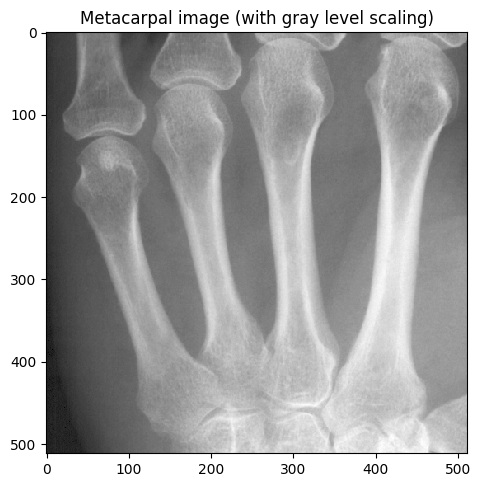

In [141]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray level scaling)')
io.show()

<h4>Histogram function</h4>
<h6>exercice 8-9: Computing and visualising histograms, find the most common range of intensities</h6>

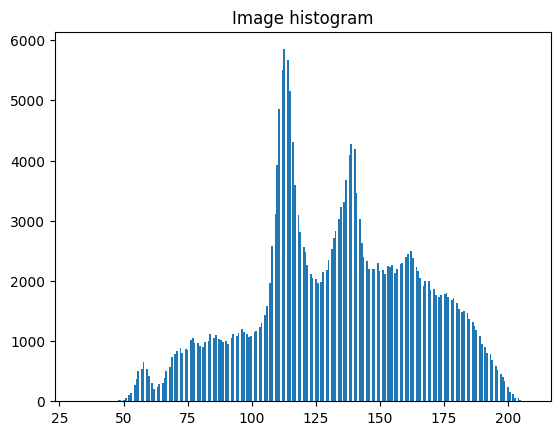

There are 1147.0 pixel values in bin 100


In [142]:
h = plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

(array([   77.,  5845., 15250., 19504., 57973., 45443., 48493., 36484.,
        26946.,  6129.]),
 array([ 32. ,  49.6,  67.2,  84.8, 102.4, 120. , 137.6, 155.2, 172.8,
        190.4, 208. ]),
 <BarContainer object of 10 artists>)

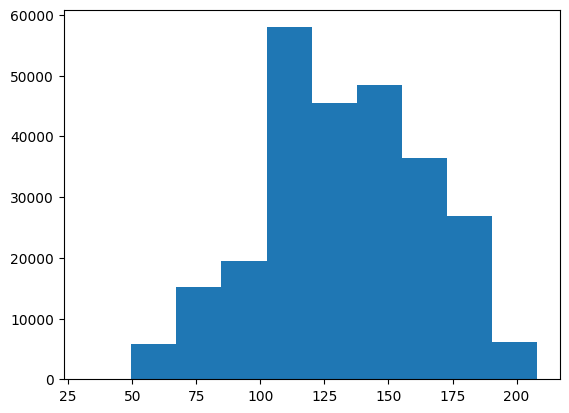

In [143]:
plt.hist(im_org.ravel())

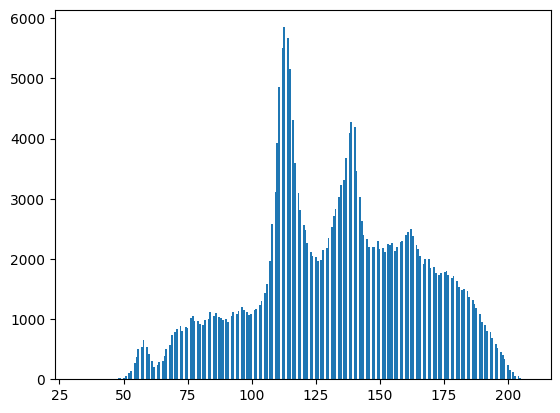

In [144]:
h = plt.hist(im_org.ravel(), bins=256)


In [145]:
max_frequency = np.max(h[0])
most_frequent_val = h[1][h[0].argmax()]
print("The most frequent range is: ", most_frequent_val, " and its frequency is: ", max_frequency)

The most frequent range is:  112.4375  and its frequency is:  5848.0


<h4>Pixel values and image coordinate systems</h4>
<h6>exercice 10-11-12-13: rows, columns and masks</h6>

In [146]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


In [147]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


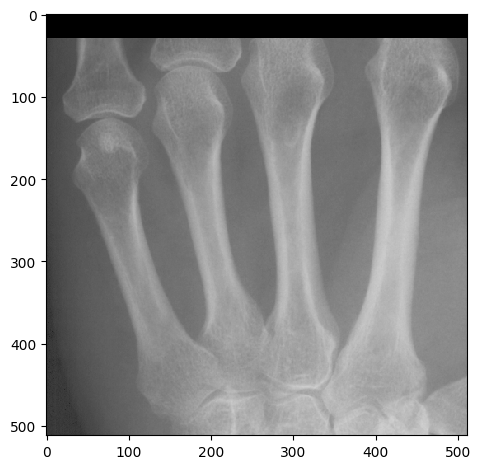

In [148]:
im_org[:30] = 0
io.imshow(im_org)
io.show()

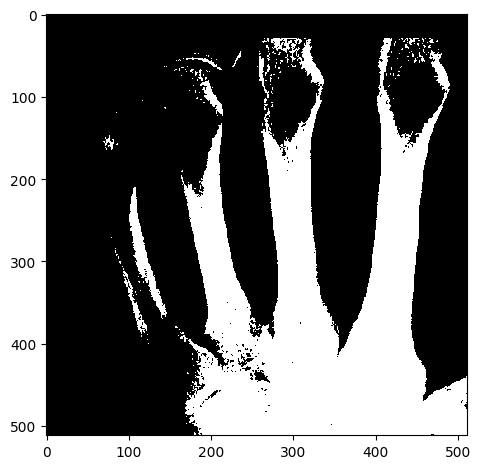

In [149]:
mask = im_org > 150
io.imshow(mask)
io.show()

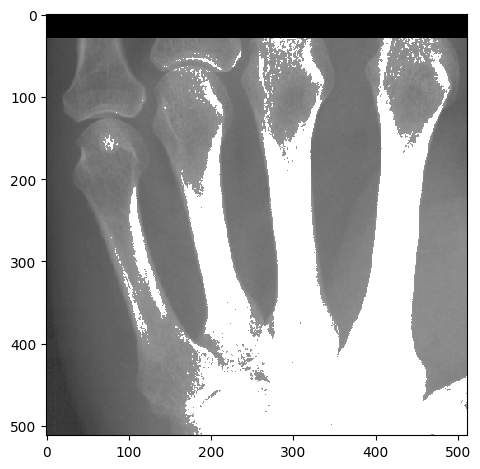

In [150]:
im_org[mask] = 255
io.imshow(im_org)
io.show()